In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

### Helper functions

In [2]:
def add_time_features(data, date_col='date'):
    df = data.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df = df.sort_values(date_col).reset_index(drop=True)

    # Time-based features
    df['Year'] = df[date_col].dt.year
    df['Month'] = df[date_col].dt.month
    df['Day'] = df[date_col].dt.day


    return df

In [3]:
def plot_bar(data, x_col, y_col, agg_func='mean', title=None, xlabel=None, ylabel=None):

    # Perform aggregation
    aggregated_data = data.groupby(x_col)[y_col].agg(agg_func).reset_index()

    # Plot the bar chart
    plt.figure(figsize=(5, 3))
    plt.bar(aggregated_data[x_col], aggregated_data[y_col], color='skyblue')
    plt.title(title if title else f'{agg_func.capitalize()} of {y_col} by {x_col}')
    plt.xlabel(xlabel if xlabel else x_col)
    plt.ylabel(ylabel if ylabel else f'{agg_func.capitalize()} {y_col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [4]:
def plot_num_sold(data, time_granularity, group_by, title=None):

    if time_granularity not in ['Year', 'Month', 'Day']:
        raise ValueError("time_granularity must be 'Year', 'Month', or 'Day'.")
    if group_by not in ['country', 'store', 'product']:
        raise ValueError("group_by must be 'country', 'store', or 'product'.")

    # Aggregate the data
    grouped_data = (
        data.groupby([time_granularity, group_by])['num_sold']
        .mean()
        .reset_index()
        .pivot(index=time_granularity, columns=group_by, values='num_sold')
    )

    # Plot
    grouped_data.plot(kind='bar', figsize=(12, 6), width=0.8)
    plt.title(title if title else f"Mean 'num_sold' by {group_by} per {time_granularity}")
    plt.xlabel(time_granularity)
    plt.ylabel('Mean num_sold')
    plt.legend(title=group_by, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [5]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [6]:
df_train.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [7]:
df_train.tail()

,id,date,country,store,product,num_sold
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0
230129,230129,2016-12-31,Singapore,Premium Sticker Mart,Kerneler Dark Mode,1622.0


In [8]:
df_train = add_time_features(df_train)
df_train.head()

,id,date,country,store,product,num_sold,Year,Month,Day
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,2010,1,1
1,65,2010-01-01,Norway,Stickers for Less,Holographic Goose,579.0,2010,1,1
2,64,2010-01-01,Norway,Discount Stickers,Kerneler Dark Mode,911.0,2010,1,1
3,63,2010-01-01,Norway,Discount Stickers,Kerneler,791.0,2010,1,1
4,62,2010-01-01,Norway,Discount Stickers,Kaggle Tiers,1525.0,2010,1,1


In [9]:
df_train.id.nunique()

230130

In [10]:
df_train.groupby('country').size()

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
dtype: int64

In [11]:
df_train.groupby(['country', 'store']).size()

country    store               
Canada     Discount Stickers       12785
           Premium Sticker Mart    12785
           Stickers for Less       12785
Finland    Discount Stickers       12785
           Premium Sticker Mart    12785
           Stickers for Less       12785
Italy      Discount Stickers       12785
           Premium Sticker Mart    12785
           Stickers for Less       12785
Kenya      Discount Stickers       12785
           Premium Sticker Mart    12785
           Stickers for Less       12785
Norway     Discount Stickers       12785
           Premium Sticker Mart    12785
           Stickers for Less       12785
Singapore  Discount Stickers       12785
           Premium Sticker Mart    12785
           Stickers for Less       12785
dtype: int64

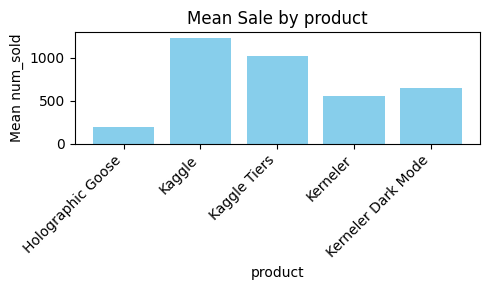

In [12]:
plot_bar(df_train, x_col='product', y_col='num_sold', title='Mean Sale by product')

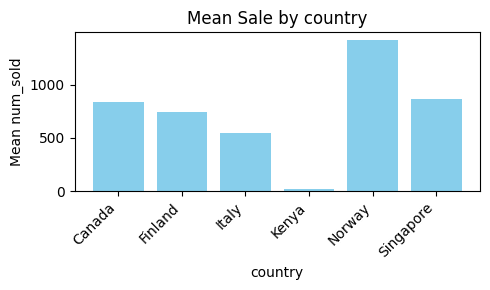

In [13]:
plot_bar(df_train, x_col='country', y_col='num_sold', title='Mean Sale by country')

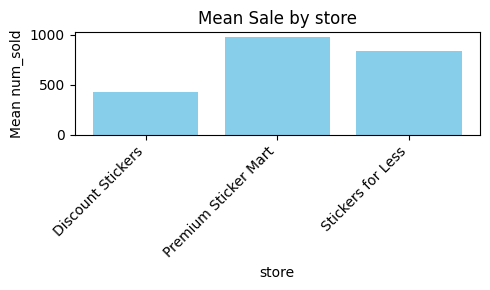

In [14]:
plot_bar(df_train, x_col='store', y_col='num_sold', title='Mean Sale by store')

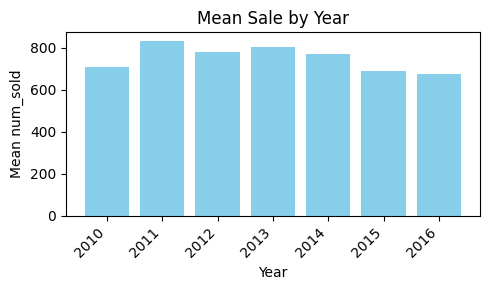

In [15]:
plot_bar(df_train, x_col='Year', y_col='num_sold', title='Mean Sale by Year')

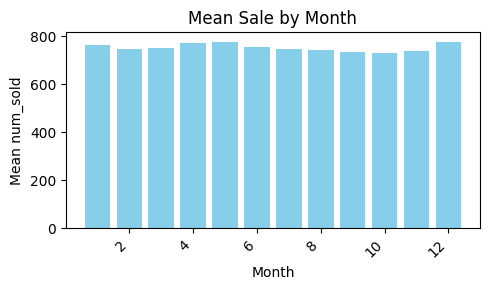

In [16]:
plot_bar(df_train, x_col='Month', y_col='num_sold', title='Mean Sale by Month')

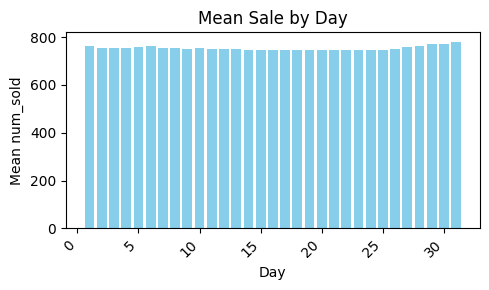

In [17]:
plot_bar(df_train, x_col='Day', y_col='num_sold', title='Mean Sale by Day')

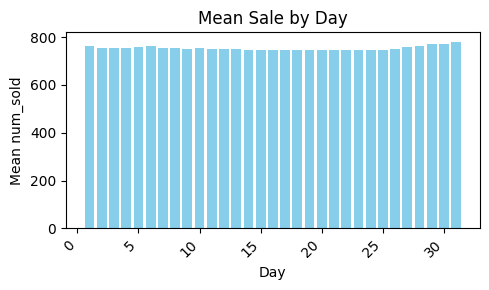

In [18]:
plot_bar(df_train, x_col='Day', y_col='num_sold', agg_func='mean', title='Mean Sale by Day')

In [19]:
country_list = df_train['country'].unique().tolist()
store_list = df_train['store'].unique().tolist()
product_list = df_train['product'].unique().tolist()

df_train[
    (df_train['country'] == random.choice(country_list))
]

,id,date,country,store,product,num_sold,Year,Month,Day
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,2010,1,1
52,14,2010-01-01,Canada,Premium Sticker Mart,Kerneler Dark Mode,1213.0,2010,1,1
53,13,2010-01-01,Canada,Premium Sticker Mart,Kerneler,950.0,2010,1,1
54,11,2010-01-01,Canada,Premium Sticker Mart,Kaggle,2212.0,2010,1,1
55,10,2010-01-01,Canada,Premium Sticker Mart,Holographic Goose,375.0,2010,1,1
...,...,...,...,...,...,...,...,...,...
230099,230044,2016-12-31,Canada,Discount Stickers,Kerneler Dark Mode,471.0,2016,12,31
230100,230043,2016-12-31,Canada,Discount Stickers,Kerneler,401.0,2016,12,31
230101,230042,2016-12-31,Canada,Discount Stickers,Kaggle Tiers,622.0,2016,12,31
230102,230041,2016-12-31,Canada,Discount Stickers,Kaggle,874.0,2016,12,31


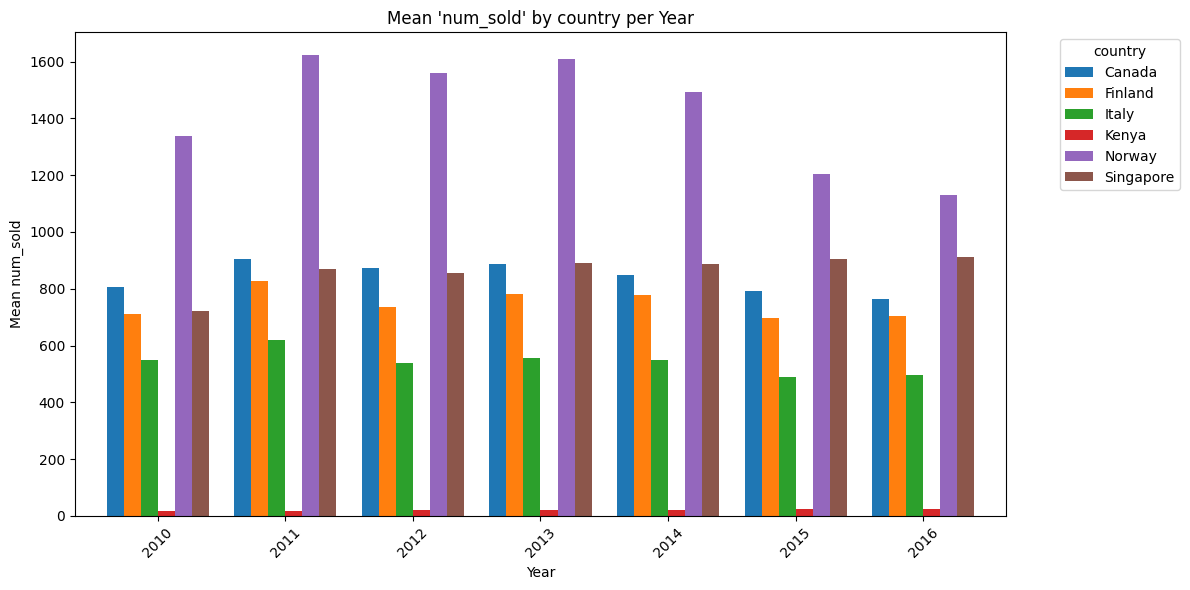

In [20]:
plot_num_sold(df_train, time_granularity='Year', group_by='country')

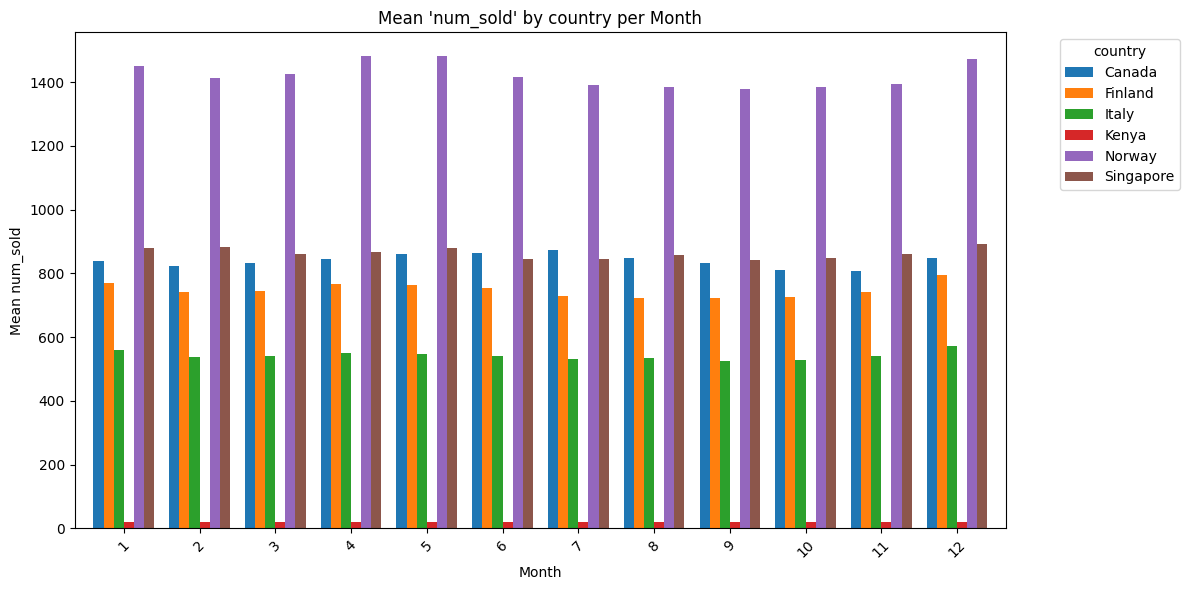

In [21]:
plot_num_sold(df_train, time_granularity='Month', group_by='country')

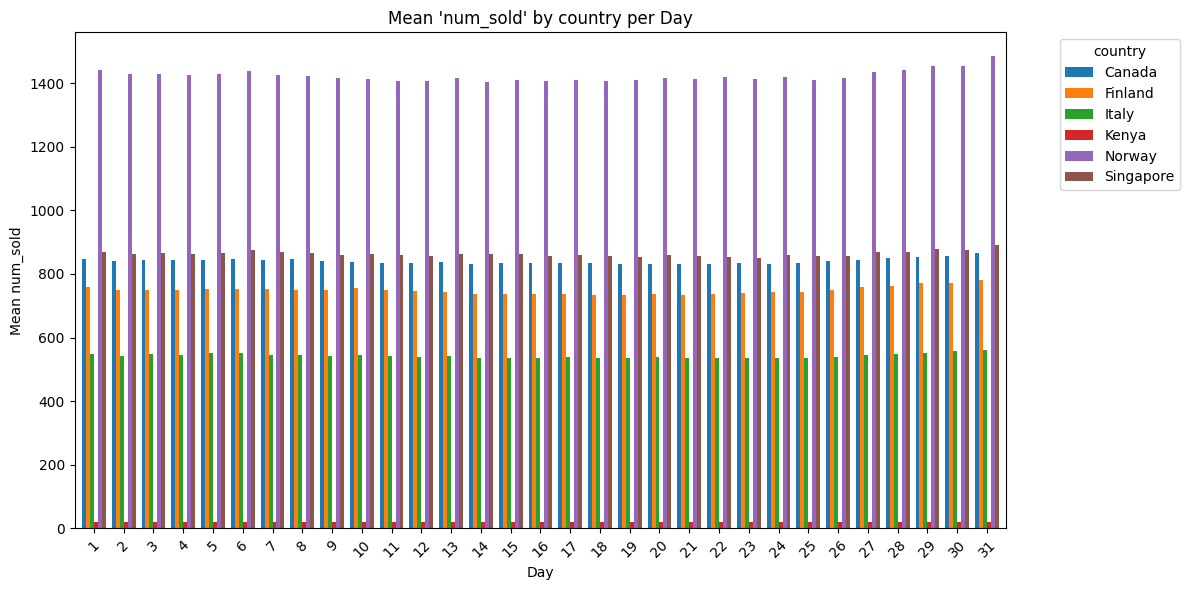

In [22]:
plot_num_sold(df_train, time_granularity='Day', group_by='country')

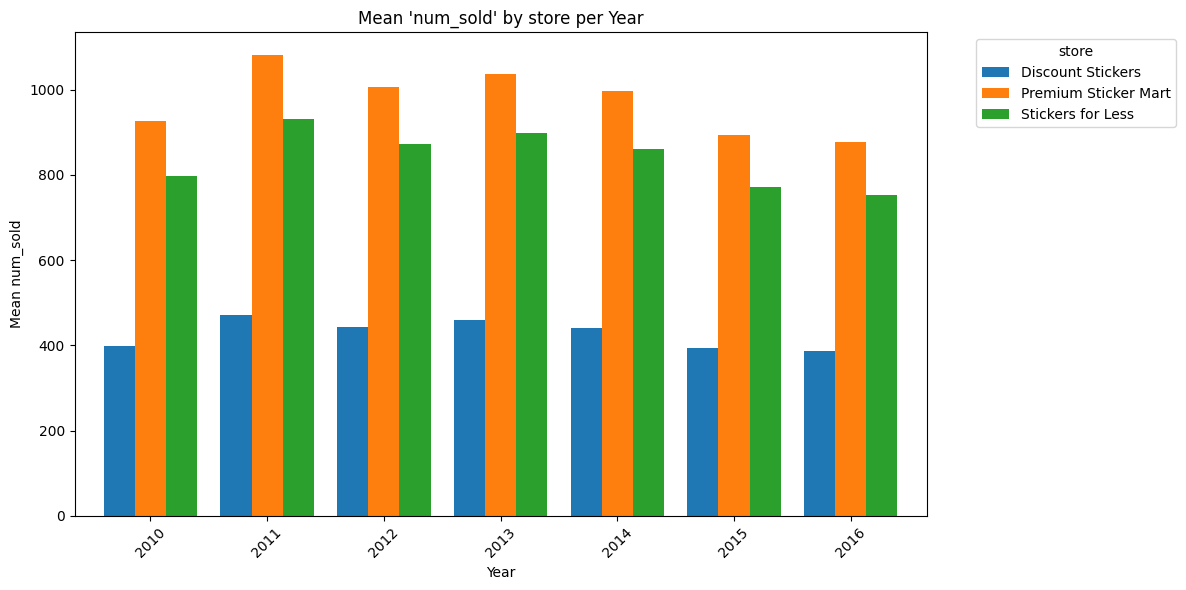

In [23]:
plot_num_sold(df_train, time_granularity='Year', group_by='store')

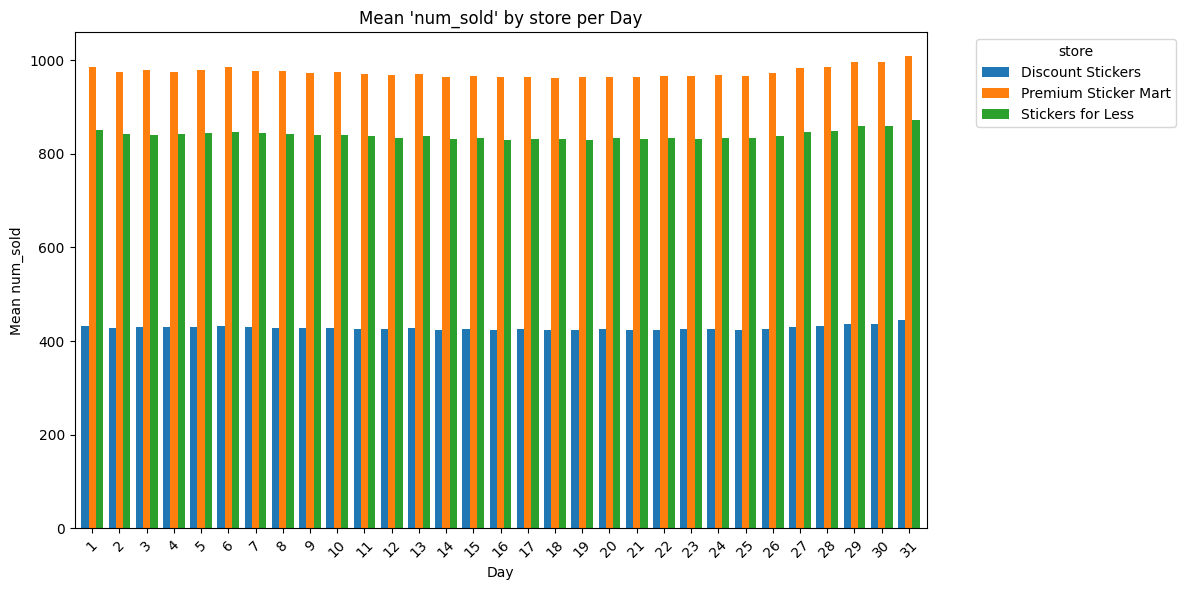

In [24]:
plot_num_sold(df_train, time_granularity='Day', group_by='store')

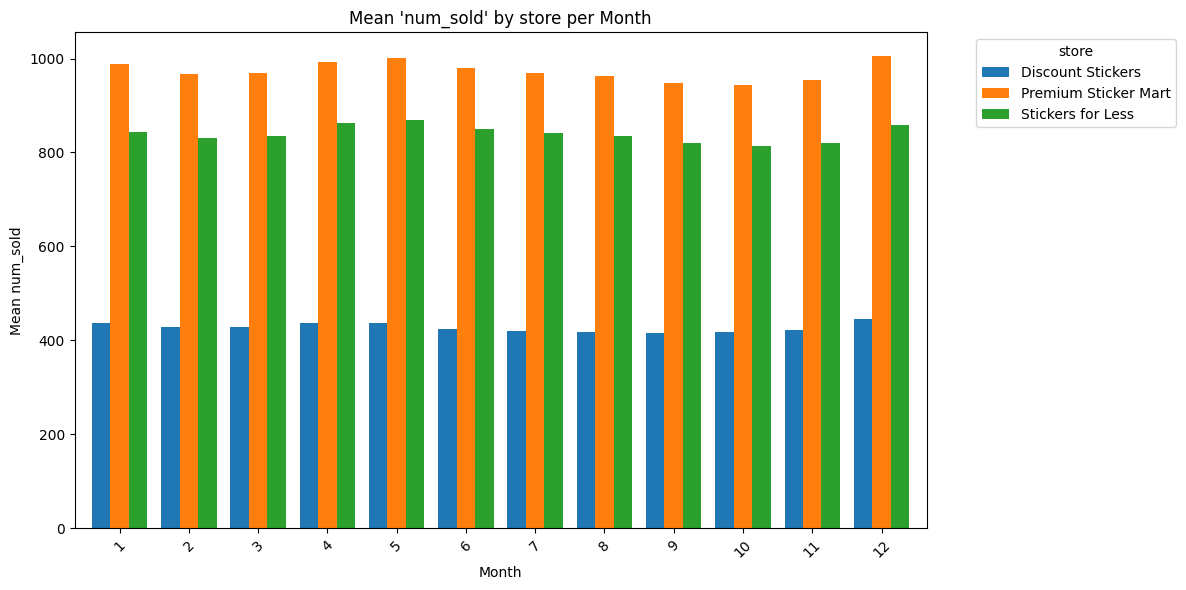

In [25]:
plot_num_sold(df_train, time_granularity='Month', group_by='store')

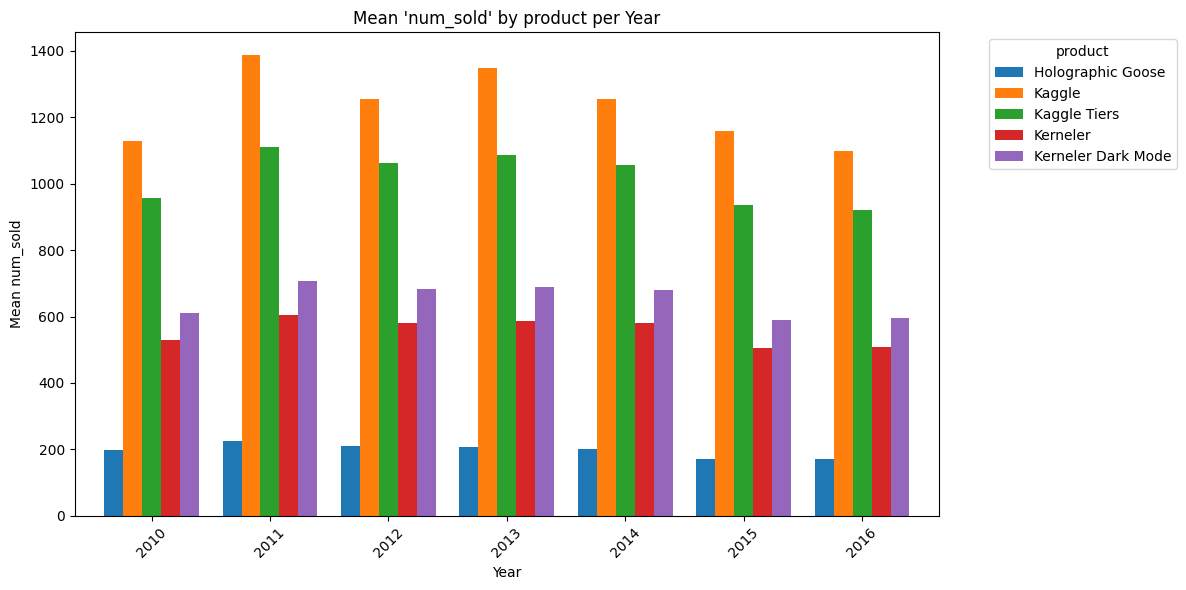

In [26]:
plot_num_sold(df_train, time_granularity='Year', group_by='product')

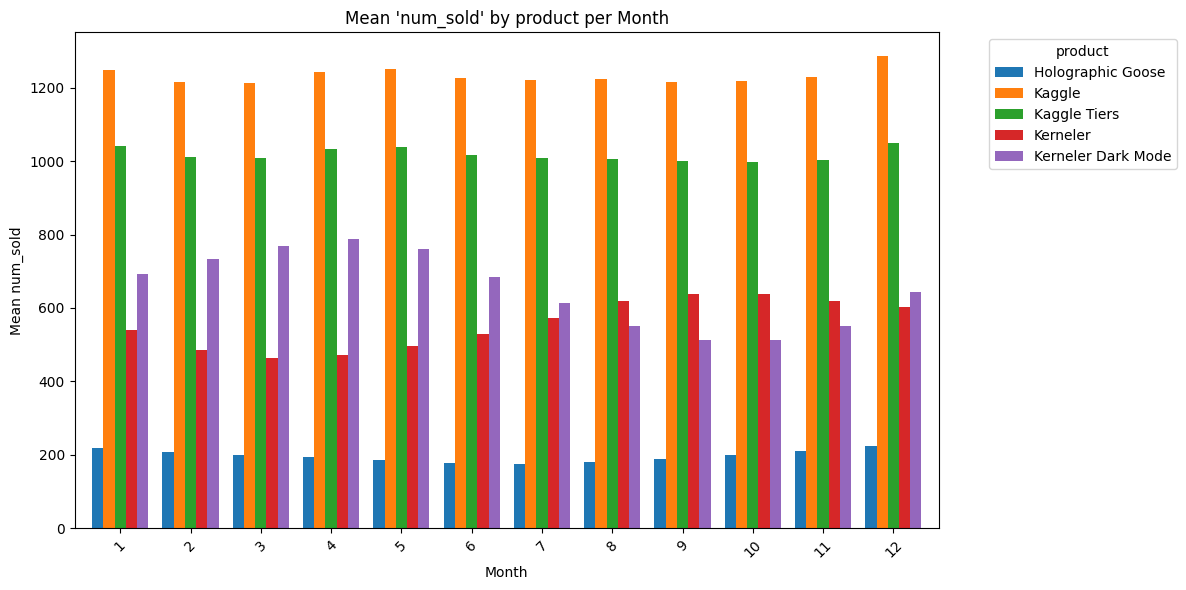

In [27]:
plot_num_sold(df_train, time_granularity='Month', group_by='product')

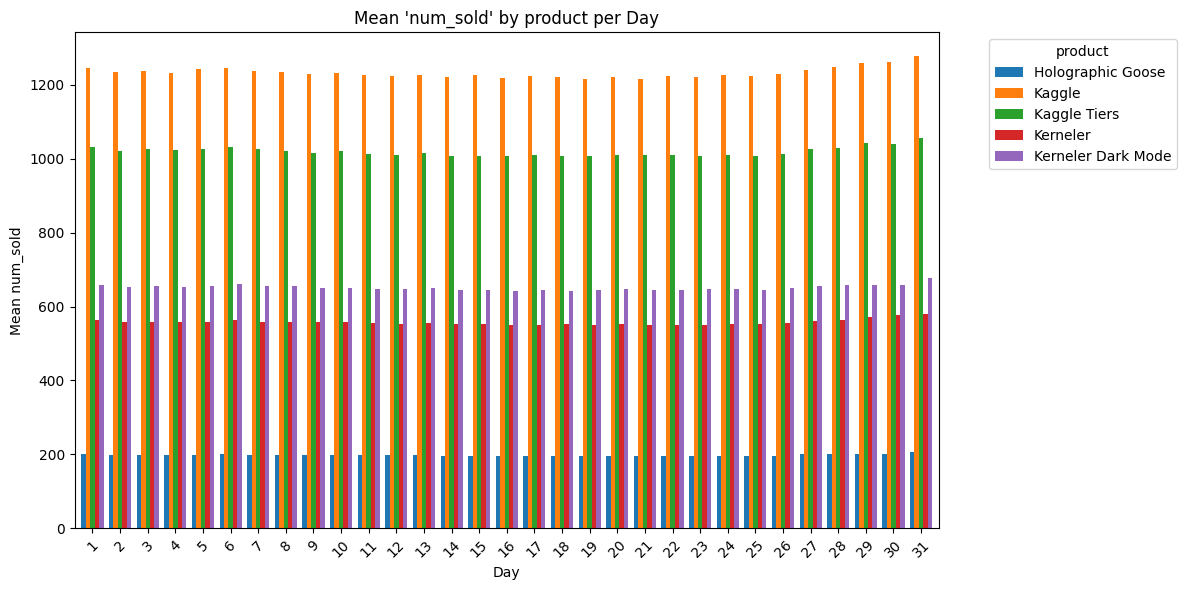

In [28]:
plot_num_sold(df_train, time_granularity='Day', group_by='product')

In [29]:
product_list

['Holographic Goose',
 'Kerneler Dark Mode',
 'Kerneler',
 'Kaggle Tiers',
 'Kaggle']

## Missing value check

In [30]:
df_train.isna().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
Year           0
Month          0
Day            0
dtype: int64

In [31]:
df_test.isna().sum()

id         0
date       0
country    0
store      0
product    0
dtype: int64

In [32]:
# ensure the number of data is consistent across all dates
assert df_train.groupby('date').size().min() == df_train.groupby('date').size().max()

- Only num_sold shows missing values

In [33]:
df_train[(df_train['country'] == 'Canada') & (df_train['store'] == 'Discount Stickers') & (df_train['product'] == 'Holographic Goose')]['num_sold'].max()

nan

In [34]:
def calculate_na_portion(data, groupby_col, count_col='num_sold'):
    """
    Calculate the portion of missing values (NA) for each unique value in the specified column.

    Parameters:
        data (pd.DataFrame): The DataFrame containing the data.
        groupby_col (str): The column to group by (e.g., 'product', 'store', etc.).
        count_col (str): The column to check for missing values (e.g., 'num_sold').

    Returns:
        pd.DataFrame: A DataFrame with the unique values of groupby_col and their NA portion (%).
    """

    Mean_count = data.groupby(groupby_col)[count_col].count()
    
    na_count = data[data[count_col].isna()].groupby([groupby_col]).size().reset_index(name='na_count')
    
    na_portion = pd.merge(Mean_count, na_count, how='inner', on=groupby_col)

    na_portion['na_portion'] = np.round(na_portion['na_count'] / na_portion[count_col]*100, 2)

    
    return na_portion


In [35]:
calculate_na_portion(df_train, groupby_col='product', count_col='num_sold')

,product,num_sold,na_count,na_portion
0,Holographic Goose,37220,8806,23.66
1,Kerneler,45962,64,0.14
2,Kerneler Dark Mode,46025,1,0.00


- The missing values for num_sold are mainly concentrated in the 'Holographic Goose' product, which accounts for 23.66% of missing values.

In [36]:
calculate_na_portion(df_train, groupby_col='store', count_col='num_sold')

,store,num_sold,na_count,na_portion
0,Discount Stickers,71531,5179,7.24
1,Premium Sticker Mart,75684,1026,1.36
2,Stickers for Less,74044,2666,3.60


In [37]:
calculate_na_portion(df_train, groupby_col='country', count_col='num_sold')

,country,num_sold,na_count,na_portion
0,Canada,34109,4246,12.45
1,Kenya,33730,4625,13.71


In [38]:
calculate_na_portion(df_train, groupby_col='date', count_col='num_sold')

,date,num_sold,na_count,na_portion
0,2010-01-01,88,2,2.27
1,2010-01-02,88,2,2.27
2,2010-01-03,88,2,2.27
3,2010-01-04,87,3,3.45
4,2010-01-05,87,3,3.45
...,...,...,...,...
2552,2016-12-27,88,2,2.27
2553,2016-12-28,88,2,2.27
2554,2016-12-29,88,2,2.27
2555,2016-12-30,88,2,2.27


- Need to develop the imputation strategies